### 1) Frame: BDDlab demo  

##### inicialization

In [65]:
import random
import numpy as np

In [66]:
#Wrapper for cudd.h  Generated with:
#ctypesgen -llibcudd-3.0.0.so cudd.h -o cudd.py
%run -i cudd.py  

In [67]:
# compiled with  ./configure --enable-shared , see readme from cudd-3.0.0
import ctypes
libcudd = ctypes.CDLL("./libcudd-3.0.0.so")

In [68]:
%run -i cuddCtypesDeclar.py

In [69]:
# my C library, for pictures, dumps and access to some internals of CUDD
libBDDlab = ctypes.CDLL("./BDDlab/libBDDlab.so")

In [70]:
%run -i BDDlabCtypesDeclar.py

In [71]:
# my python library, to prototyping. Mature functions go to BDDlab C library
%run -i BDDlab.py

#### Inicialización del gestor

In [72]:
migestor = libcudd.Cudd_Init(0,0,CUDD_UNIQUE_SLOTS,CUDD_CACHE_SLOTS,0)

libcudd.Cudd_AutodynDisable(migestor)

1) ejemplo 1, la paridat

In [73]:
B3= BoolAlg(3)

In [74]:
B3

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [75]:
pi3=funcMintermIni(migestor,[[0,0,0],[0,1,1],[1,0,1],[1,1,0]])


In [76]:
pi2=funcMintermIni(migestor,[[0,0,0],[0,0,1],[1,1,0],[1,1,1]])

In [77]:
pi1 = libcudd.Cudd_bddIthVar(migestor,0)

In [78]:
pi=[pi1,pi2,pi3]

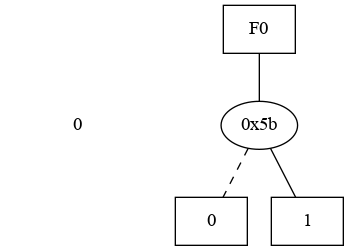

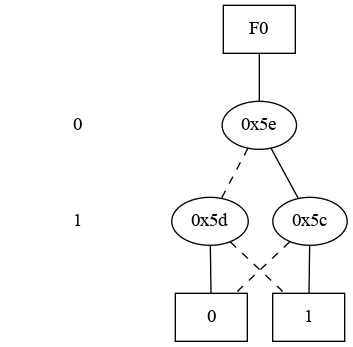

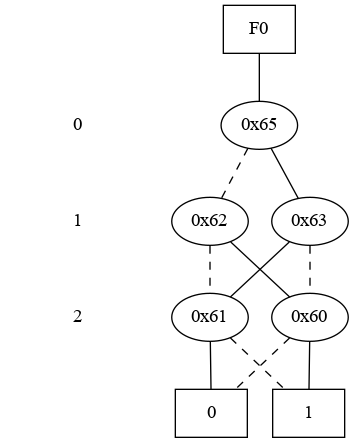

[None, None, None]

In [79]:
[grafica(migestor,pi[i]) for i in range(3)]

In [80]:
sigma3 = CambioInverso(migestor,pi)

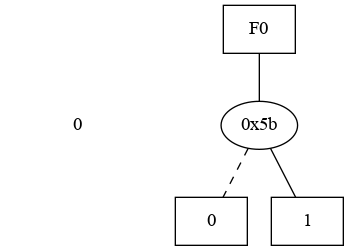

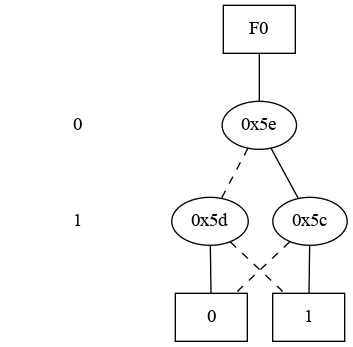

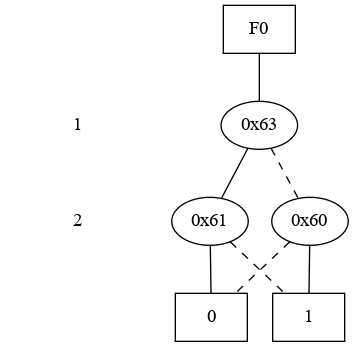

[None, None, None]

In [81]:
[grafica(migestor,sigma3[i]) for i in range(3)]

In [82]:
[[u,cambiaBaseArray(migestor, u,pi)] for u in B3]

[[[0, 0, 0], [0, 1, 1]],
 [[0, 0, 1], [0, 1, 0]],
 [[0, 1, 0], [0, 0, 0]],
 [[0, 1, 1], [0, 0, 1]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 1], [1, 0, 1]],
 [[1, 1, 0], [1, 1, 1]],
 [[1, 1, 1], [1, 1, 0]]]

In [83]:
print(''.join(map(str,B3[3])))

011


In [84]:
[[print(''.join(map(str,u)) + '\\rightsquigarrow ' + ''.join(map(str,cambiaBaseArray(migestor, u,pi))) + ' \\\\')] for u in B3]

000\rightsquigarrow 011 \\
001\rightsquigarrow 010 \\
010\rightsquigarrow 000 \\
011\rightsquigarrow 001 \\
100\rightsquigarrow 100 \\
101\rightsquigarrow 101 \\
110\rightsquigarrow 111 \\
111\rightsquigarrow 110 \\


[[None], [None], [None], [None], [None], [None], [None], [None]]

In [85]:
pi4=randomBase(migestor,4)

In [86]:
pi4

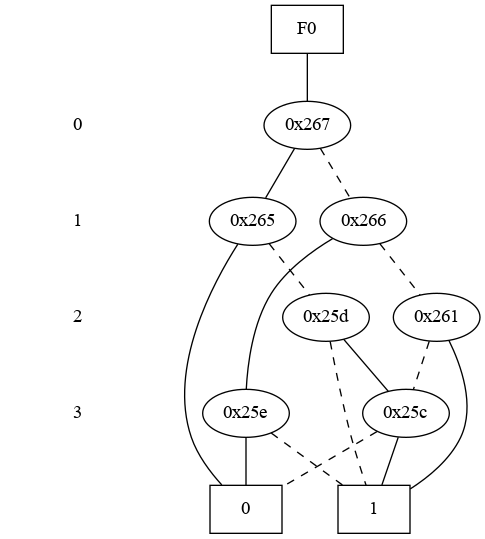

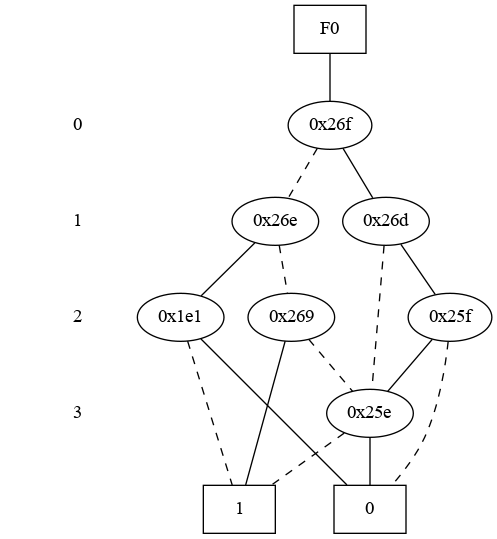

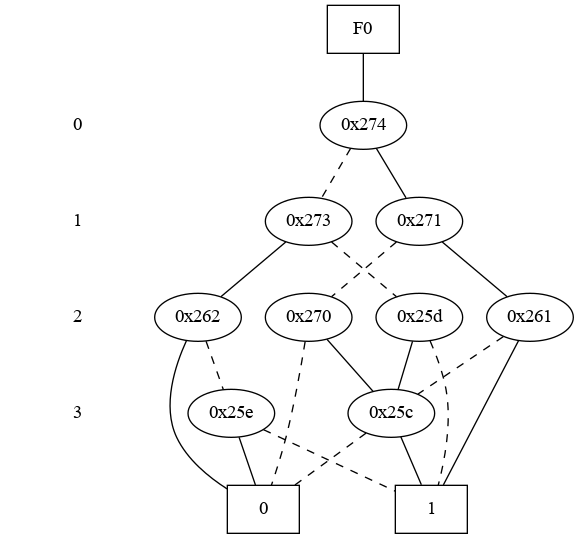

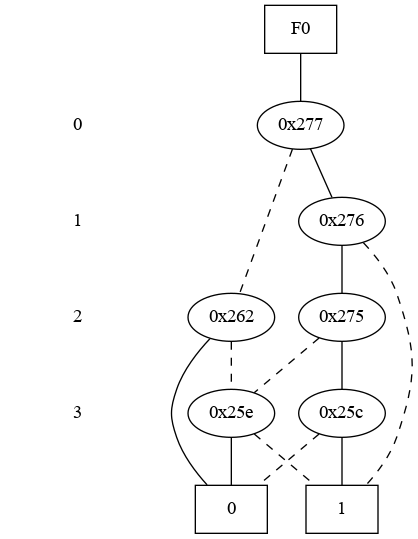

[None, None, None, None]

In [87]:
[grafica(migestor,pi4[i]) for i in range(4)]

In [88]:
sigma4 = CambioInverso(migestor,pi4)

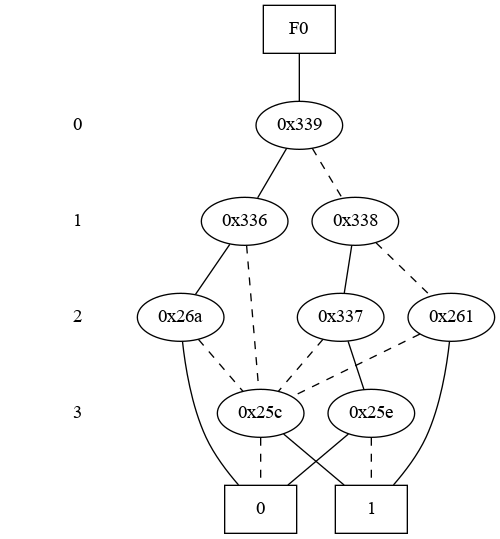

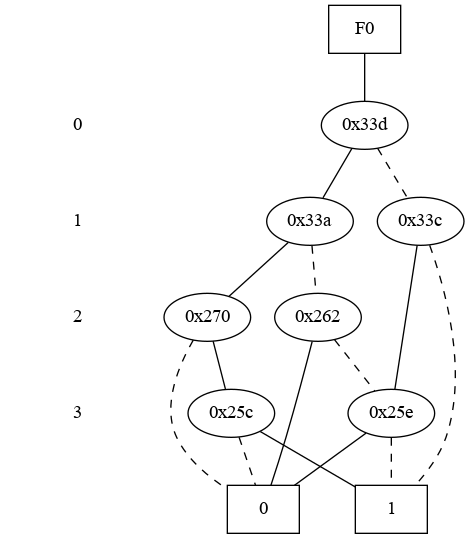

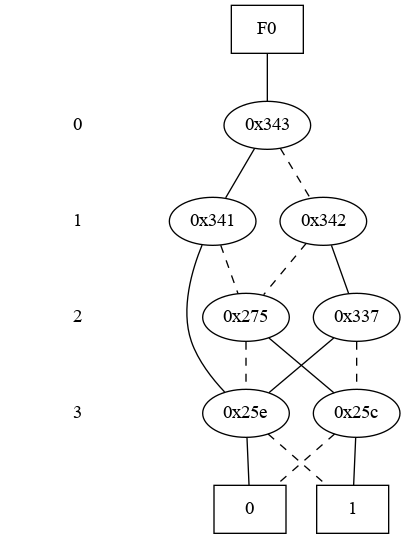

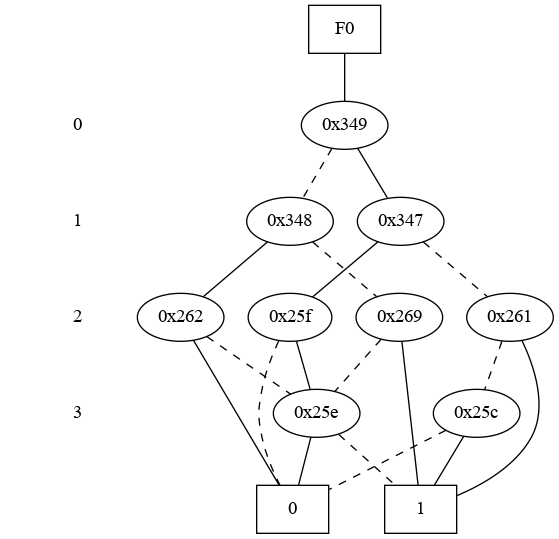

[None, None, None, None]

In [89]:
[grafica(migestor,sigma4[i]) for i in range(4)]

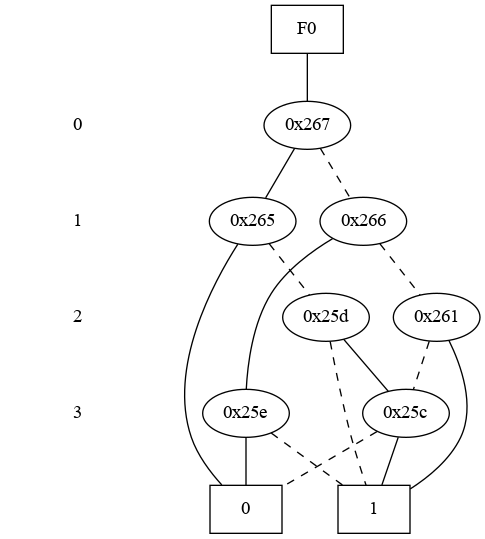

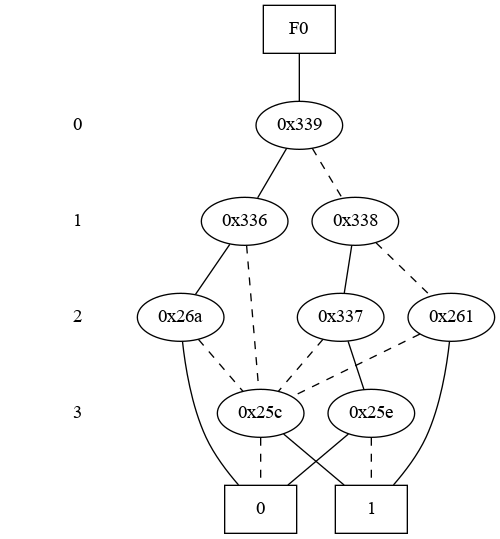

[None, None]

In [90]:
[grafica(migestor,pi4[0]), grafica(migestor,sigma4[0]) ]

In [91]:
B4 = BoolAlg(4)

In [92]:
B4

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [93]:
v_arr =[cambiaBaseArray(migestor,u,pi4) for u in B4]

In [94]:
list(zip(B4,v_arr))

[([0, 0, 0, 0], [0, 1, 1, 1]),
 ([0, 0, 0, 1], [1, 0, 1, 0]),
 ([0, 0, 1, 0], [1, 1, 0, 0]),
 ([0, 0, 1, 1], [1, 1, 1, 0]),
 ([0, 1, 0, 0], [1, 1, 1, 1]),
 ([0, 1, 0, 1], [0, 1, 0, 0]),
 ([0, 1, 1, 0], [1, 0, 0, 0]),
 ([0, 1, 1, 1], [0, 0, 0, 0]),
 ([1, 0, 0, 0], [1, 1, 0, 1]),
 ([1, 0, 0, 1], [1, 0, 0, 1]),
 ([1, 0, 1, 0], [0, 1, 0, 1]),
 ([1, 0, 1, 1], [1, 0, 1, 1]),
 ([1, 1, 0, 0], [0, 0, 0, 1]),
 ([1, 1, 0, 1], [0, 0, 1, 0]),
 ([1, 1, 1, 0], [0, 1, 1, 0]),
 ([1, 1, 1, 1], [0, 0, 1, 1])]

In [95]:
u_arr =[cambiaBaseArray(migestor,v,sigma4) for v in v_arr]

In [96]:
u_arr

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [97]:
[[u,cambiaBaseArray(migestor, u,pi4)] for u in B4]

[[[0, 0, 0, 0], [0, 1, 1, 1]],
 [[0, 0, 0, 1], [1, 0, 1, 0]],
 [[0, 0, 1, 0], [1, 1, 0, 0]],
 [[0, 0, 1, 1], [1, 1, 1, 0]],
 [[0, 1, 0, 0], [1, 1, 1, 1]],
 [[0, 1, 0, 1], [0, 1, 0, 0]],
 [[0, 1, 1, 0], [1, 0, 0, 0]],
 [[0, 1, 1, 1], [0, 0, 0, 0]],
 [[1, 0, 0, 0], [1, 1, 0, 1]],
 [[1, 0, 0, 1], [1, 0, 0, 1]],
 [[1, 0, 1, 0], [0, 1, 0, 1]],
 [[1, 0, 1, 1], [1, 0, 1, 1]],
 [[1, 1, 0, 0], [0, 0, 0, 1]],
 [[1, 1, 0, 1], [0, 0, 1, 0]],
 [[1, 1, 1, 0], [0, 1, 1, 0]],
 [[1, 1, 1, 1], [0, 0, 1, 1]]]

In [98]:
[[print(''.join(map(str,u)) + '\\rightsquigarrow ' + ''.join(map(str,cambiaBaseArray(migestor, u,pi4))) + ' \\\\')] for u in B4]

0000\rightsquigarrow 0111 \\
0001\rightsquigarrow 1010 \\
0010\rightsquigarrow 1100 \\
0011\rightsquigarrow 1110 \\
0100\rightsquigarrow 1111 \\
0101\rightsquigarrow 0100 \\
0110\rightsquigarrow 1000 \\
0111\rightsquigarrow 0000 \\
1000\rightsquigarrow 1101 \\
1001\rightsquigarrow 1001 \\
1010\rightsquigarrow 0101 \\
1011\rightsquigarrow 1011 \\
1100\rightsquigarrow 0001 \\
1101\rightsquigarrow 0010 \\
1110\rightsquigarrow 0110 \\
1111\rightsquigarrow 0011 \\


[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None]]

In [99]:
pi4[0]

In [100]:
[u for u in B4 if evalu(migestor,pi4[0],u)==0]

[[0, 0, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 1],
 [1, 0, 1, 0],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [101]:
evalu(migestor,pi4[0],B4[3])

1

In [102]:
pi0_B0=[u for u in B4 if evalu(migestor,pi4[0],u)==0]
pi0_B1=[u for u in B4 if evalu(migestor,pi4[0],u)==1]
pi1_B0=[u for u in B4 if evalu(migestor,pi4[1],u)==0]
pi1_B1=[u for u in B4 if evalu(migestor,pi4[1],u)==1]
pi2_B0=[u for u in B4 if evalu(migestor,pi4[2],u)==0]
pi2_B1=[u for u in B4 if evalu(migestor,pi4[2],u)==1]
pi3_B0=[u for u in B4 if evalu(migestor,pi4[3],u)==0]
pi3_B1=[u for u in B4 if evalu(migestor,pi4[3],u)==1]


In [103]:
cad='\pi_1=&\{\{'
for u in pi0_B0:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\},\\\\ \n &\{'
for u in pi0_B1:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\}\} \\\\'

In [104]:
print(cad)

\pi_1=&\{\{0000, 0101, 0111, 1010, 1100, 1101, 1110, 1111\},\\ 
 &\{0001, 0010, 0011, 0100, 0110, 1000, 1001, 1011\}\} \\


In [105]:
cad='\pi_2=&\{\{'
for u in pi1_B0:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\},\\\\ \n &\{'
for u in pi1_B1:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\}\} \\\\'

In [106]:
print(cad)

\pi_2=&\{\{0001, 0110, 0111, 1001, 1011, 1100, 1101, 1111\},\\ 
 &\{0000, 0010, 0011, 0100, 0101, 1000, 1010, 1110\}\} \\


In [107]:
cad='\pi_3=&\{\{'
for u in pi2_B0:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\},\\\\ \n &\{'
for u in pi2_B1:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\}\} \\\\'

In [108]:
print(cad)

\pi_3=&\{\{0010, 0101, 0110, 0111, 1000, 1001, 1010, 1100\},\\ 
 &\{0000, 0001, 0011, 0100, 1011, 1101, 1110, 1111\}\} \\


In [109]:
cad='\pi_4=&\{\{'
for u in pi3_B0:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\},\\\\ \n &\{'
for u in pi3_B1:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\}\} \\\\'

In [110]:
print(cad)

\pi_4=&\{\{0001, 0010, 0011, 0101, 0110, 0111, 1101, 1110\},\\ 
 &\{0000, 0100, 1000, 1001, 1010, 1011, 1100, 1111\}\} \\


In [111]:
[[print(''.join(map(str,u)) + '\\rightsquigarrow ' + ''.join(map(str,cambiaBaseArray(migestor, u,pi4))) + ' \\\\')] for u in B4]

0000\rightsquigarrow 0111 \\
0001\rightsquigarrow 1010 \\
0010\rightsquigarrow 1100 \\
0011\rightsquigarrow 1110 \\
0100\rightsquigarrow 1111 \\
0101\rightsquigarrow 0100 \\
0110\rightsquigarrow 1000 \\
0111\rightsquigarrow 0000 \\
1000\rightsquigarrow 1101 \\
1001\rightsquigarrow 1001 \\
1010\rightsquigarrow 0101 \\
1011\rightsquigarrow 1011 \\
1100\rightsquigarrow 0001 \\
1101\rightsquigarrow 0010 \\
1110\rightsquigarrow 0110 \\
1111\rightsquigarrow 0011 \\


[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None]]

2) random function y linearizacion

In [112]:
f = randomFunc(migestor,4,0.5)

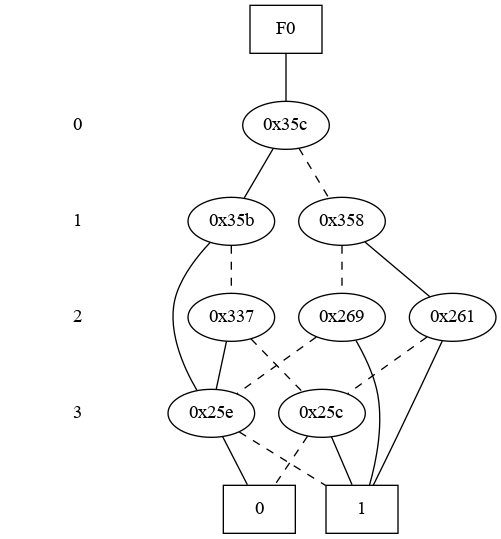

In [113]:
grafica(migestor,f)

In [114]:
prop = creaBasePropia(migestor,f,4)

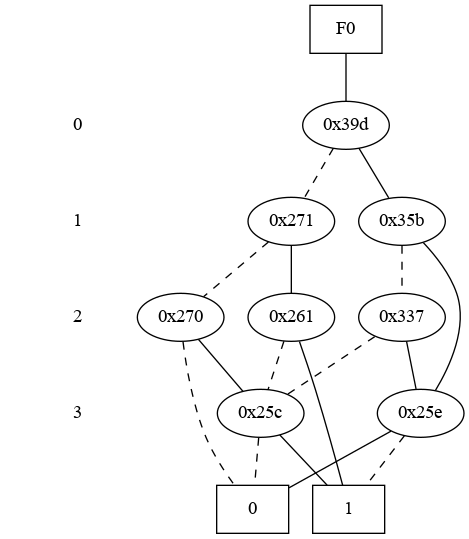

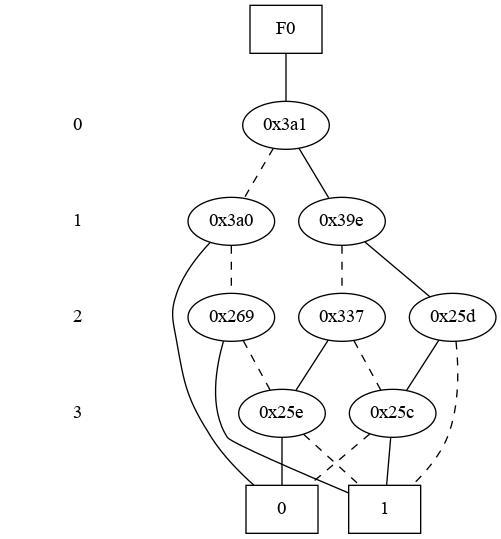

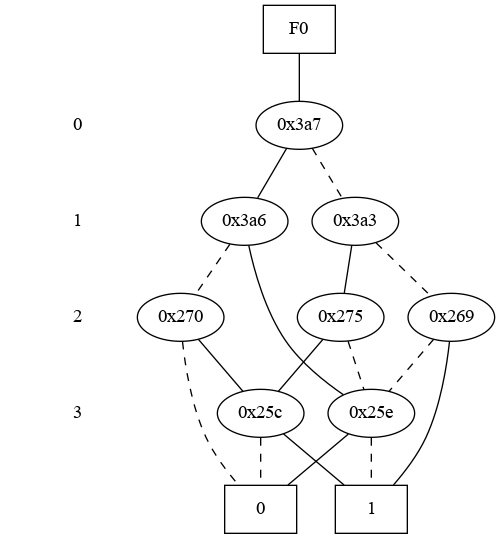

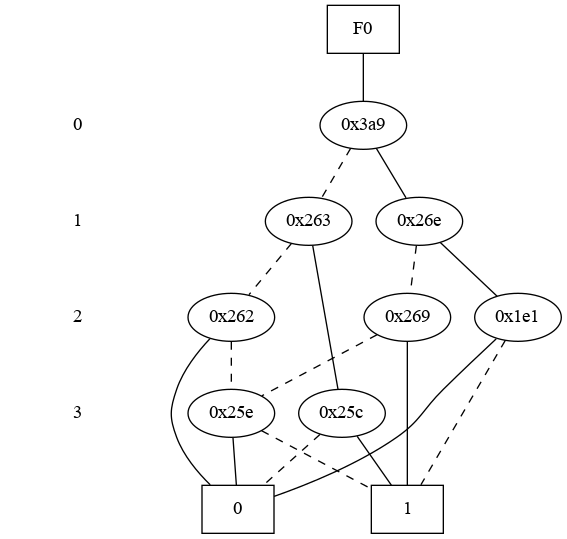

[None, None, None, None]

In [115]:
[grafica(migestor,prop[i]) for i in range(4)]

In [116]:
f2 = CambiaBase(migestor,f,prop)

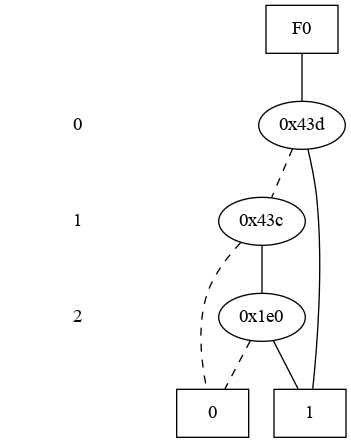

In [117]:
grafica(migestor,f2)

In [120]:
tam =6
g = randomFunc(migestor,tam,0.5)

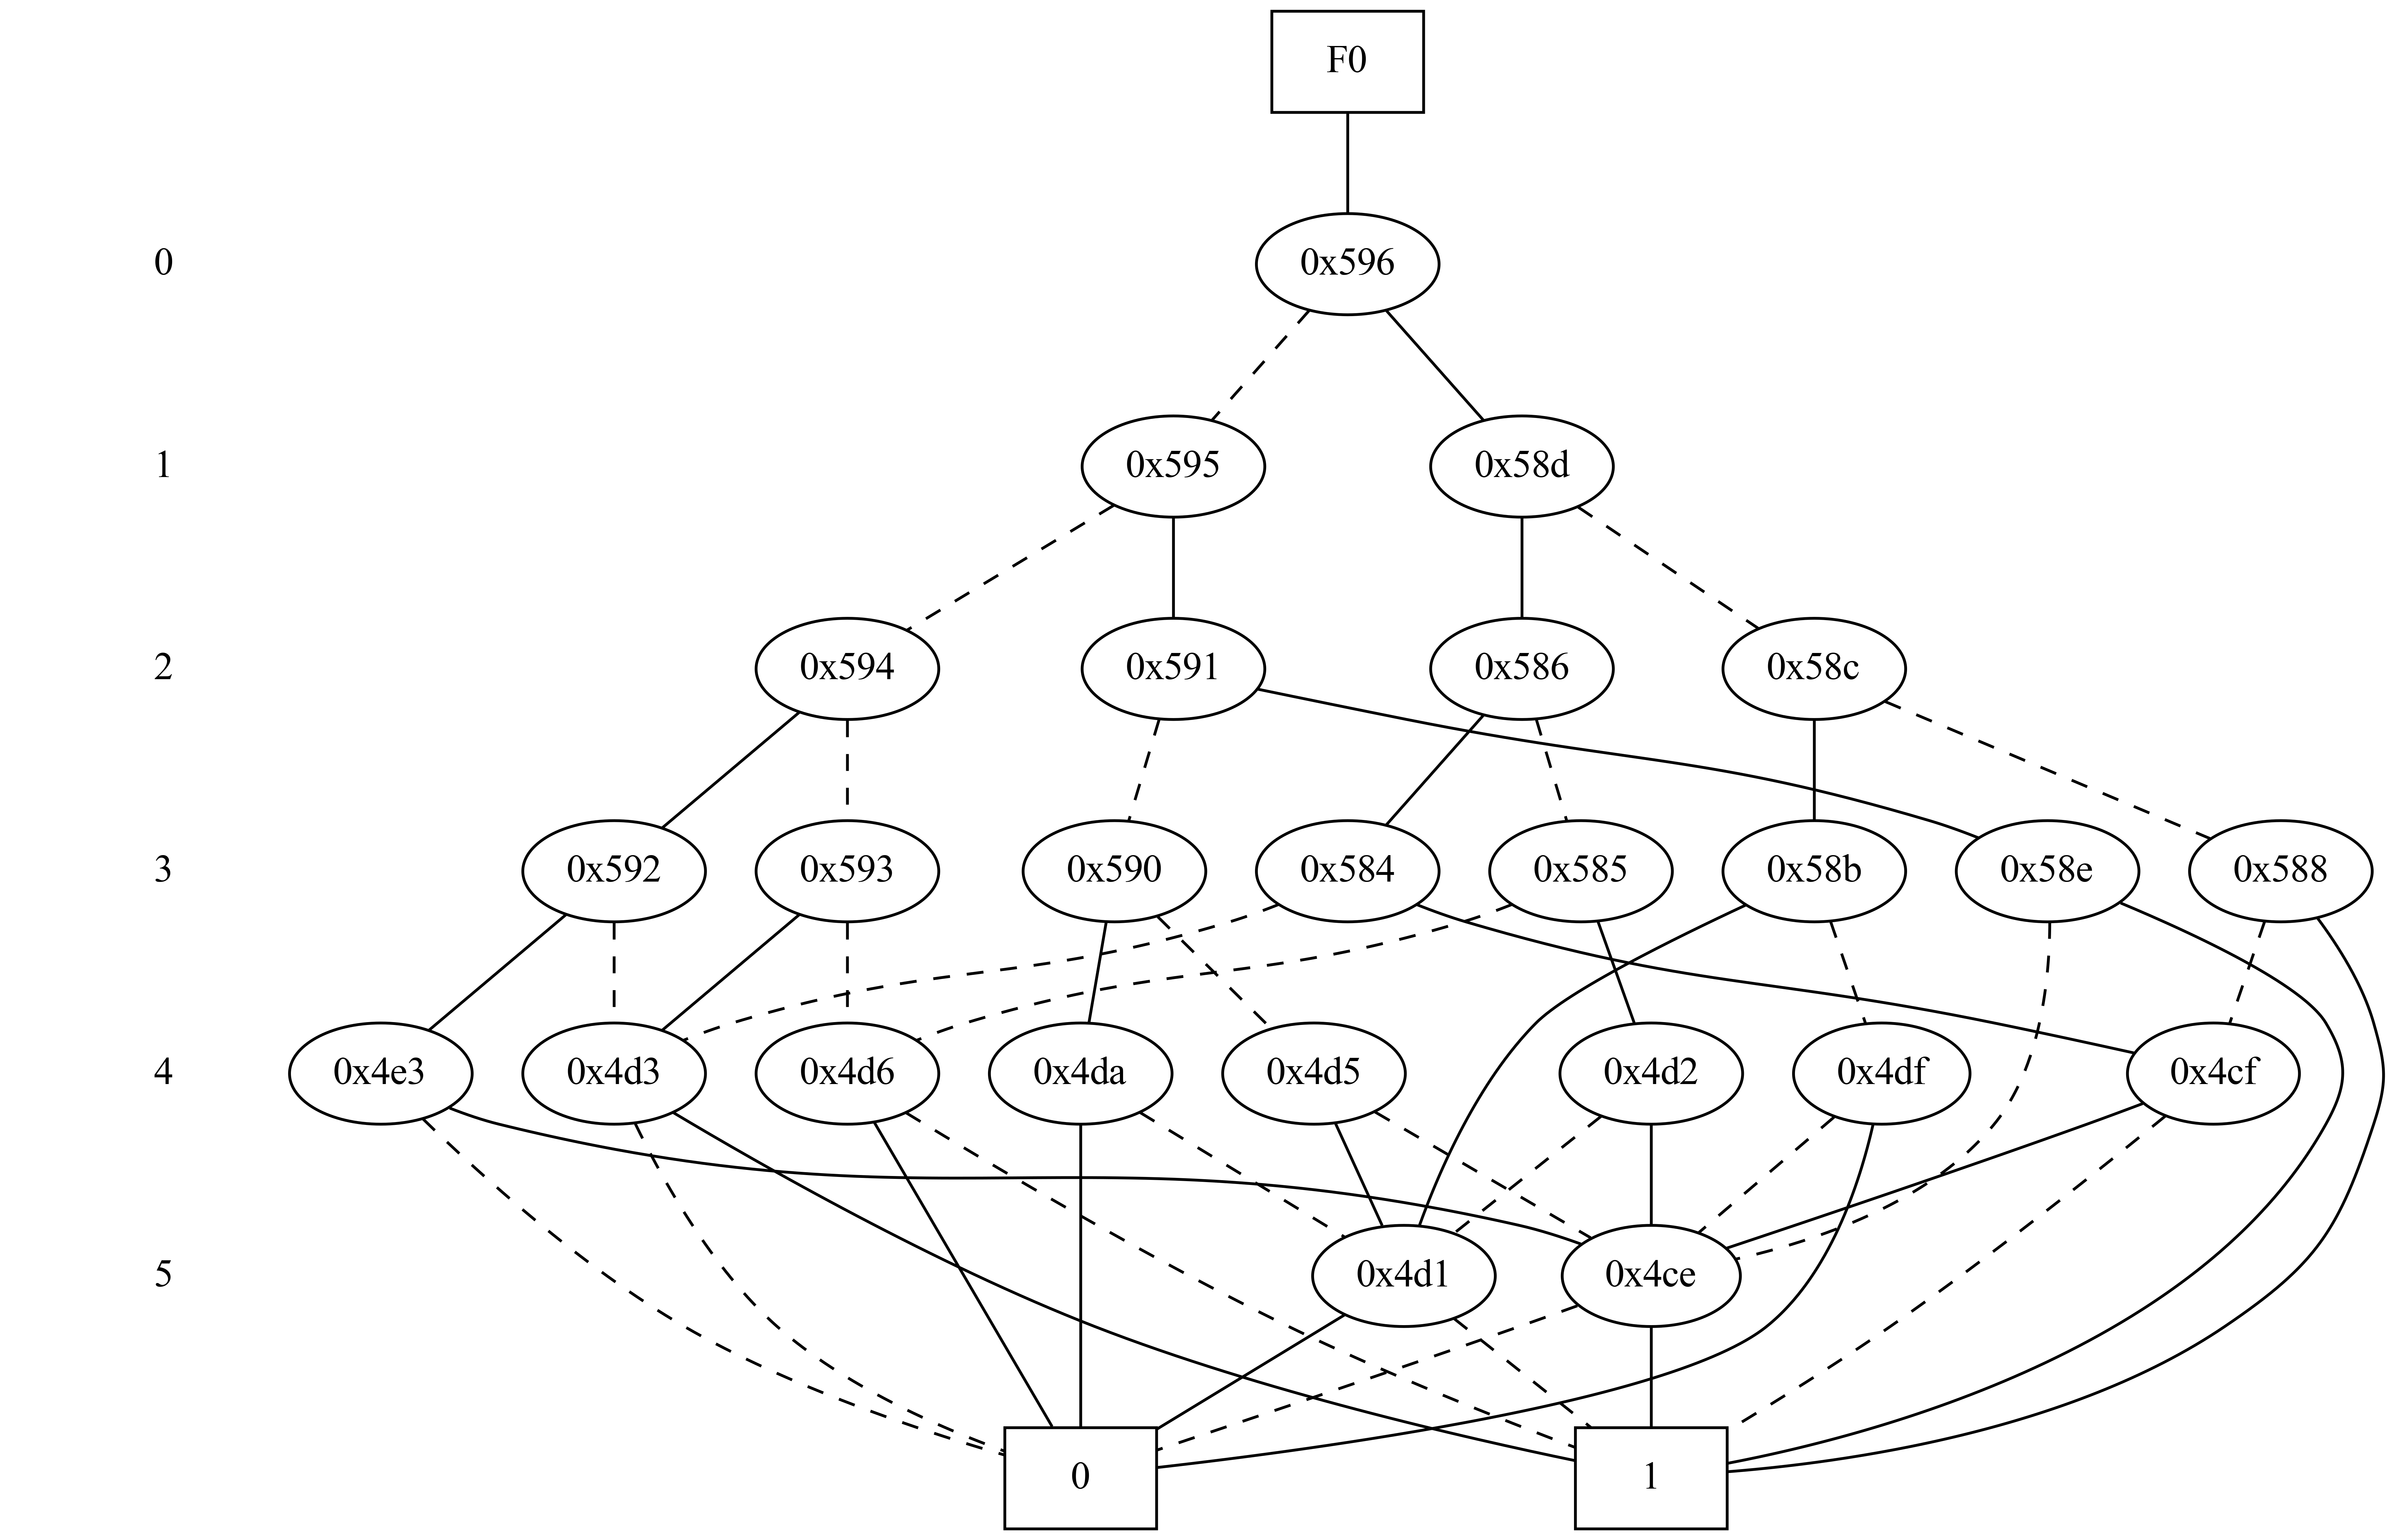

In [121]:
graficaplus(migestor,g)

In [122]:
prop2 = creaBasePropia(migestor,g,tam)

In [123]:
g2 = CambiaBase(migestor,g,prop2)

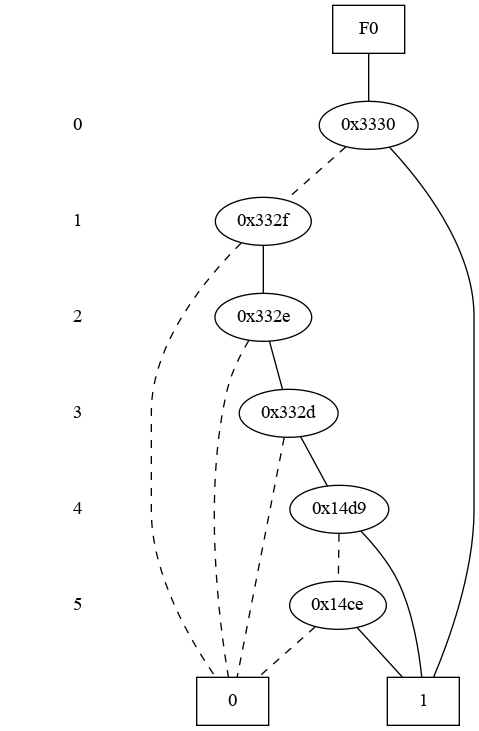

In [124]:
grafica(migestor,g2)